In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

puerto ayora ec
ushuaia ar
fagernes no
butaritari ki
port alfred za
calvinia za
geraldton au
hualmay pe
avarua ck
hilo us
ancud cl
vaini to
puerto ayora ec
busselton au
arraial do cabo br
mehamn no
sao filipe cv
lingyuan cn
kaitangata nz
busselton au
tiksi ru
barentsburg sj
brownsville us
berlevag no
ushuaia ar
jalu ly
bluff nz
karaul ru
busselton au
sampit id
iranshahr ir
thompson ca
ushuaia ar
hualmay pe
kodiak us
vaitupu wf
rikitea pf
daru pg
yerky ua
cabo san lucas mx
toowoomba au
sao joao da barra br
ibotirama br
waipawa nz
saint-philippe re
port alfred za
souillac mu
henties bay na
asau tv
butaritari ki
punta arenas cl
komsomolskiy ru
mataura pf
nagato jp
kapaa us
talara pe
ushuaia ar
upernavik gl
cabo san lucas mx
wahran dz
pisco pe
east london za
rikitea pf
suleja ng
nacala mz
chuy uy
punta arenas cl
rikitea pf
praia da vitoria pt
pochutla mx
maragogi br
yellowknife ca
kaitangata nz
dikson ru
jamestown sh
cape town za
tasiilaq gl
vaini to
barrow us
emilio carranza mx
tautira pf

amderma ru
puerto ayora ec
liverpool ca
upernavik gl
esperance au
shubarshi kz
new norfolk au
lorengau pg
taolanaro mg
lolua tv
ushuaia ar
rikitea pf
illoqqortoormiut gl
atuona pf
christchurch nz
leh in
sobradinho br
cape town za
takoradi gh
busselton au
jasper ca
butaritari ki
nogales mx
atuona pf
bredasdorp za
norman wells ca
mineiros br
sibolga id
rikitea pf
arraial do cabo br
nikolskoye ru
jensen beach us
parian dakula ph
kodiak us
puerto ayora ec
muros es
daru pg
rikitea pf
kenai us
ushuaia ar
vaini to
kyshtovka ru
bani walid ly
bluff nz
bereznik ru
ede nl
opoczno pl
avarua ck
port blair in
anadyr ru
chokurdakh ru
east london za
lake havasu city us
libertador general san martin ar
atuona pf
college us
klaksvik fo
punta arenas cl
komsomolskiy ru
kapaa us
saskylakh ru
zaoyang cn
puerto ayora ec
kapaa us
ola ru
yellowknife ca
busselton au
faya td
kieta pg
belushya guba ru
mahebourg mu
aitape pg
albany au
rovaniemi fi
marcona pe
puerto ayora ec
nanchang cn
khoy ir
sitka us
baker city 

cape town za
torbay ca
tigil ru
lagoa pt
new norfolk au
hobart au
petatlan mx
cape town za
xining cn
tuktoyaktuk ca
abu zabad sd
cape town za
mataura pf
bethel us
hermanus za
kodiak us
laguna br
ushuaia ar
jamestown sh
mozarlandia br
barentsburg sj
dikson ru
ukiah us
ushuaia ar
bilibino ru
okandja ga
hermanus za
mataura pf
nikolskoye ru
penzance gb
rikitea pf
nantucket us
saskylakh ru
narsaq gl
busselton au
ushuaia ar
byron bay au
indian head ca
bethel us
morlaix fr
rikitea pf
lavrentiya ru
ushuaia ar
ushuaia ar
fairbanks us
isangel vu
mergui mm
hobart au
butaritari ki
kautokeino no
chuy uy
taolanaro mg
kapaa us
los llanos de aridane es
san antonio cl
carnarvon au
barentsburg sj
ushuaia ar
hilo us
tuktoyaktuk ca
kapaa us
punta arenas cl
kaitangata nz
vaini to
hit iq
mataura pf
punta arenas cl
abashiri jp
hermanus za


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | fagernes
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | calvinia
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | hualmay
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | lingyuan
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | brownsville
Processing Record 22 of Set 1 | berlevag
Processing

Processing Record 37 of Set 4 | darhan
Processing Record 38 of Set 4 | atar
Processing Record 39 of Set 4 | klaksvik
Processing Record 40 of Set 4 | nambucca heads
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | skibbereen
Processing Record 43 of Set 4 | tigil
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | tumpat
Processing Record 46 of Set 4 | two rivers
Processing Record 47 of Set 4 | olafsvik
Processing Record 48 of Set 4 | eskisehir
Processing Record 49 of Set 4 | ballina
Processing Record 50 of Set 4 | severnyy-kospashskiy
Processing Record 1 of Set 5 | araouane
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | karauli
Processing Record 4 of Set 5 | puyang
Processing Record 5 of Set 5 | mecca
Processing Record 6 of Set 5 | maputo
Processing Record 7 of Set 5 | caacupe
Processing Record 8 of Set 5 | yar-sale
Processing Record 9 of Set 5 | wagar
Processing Record 10 of Set 5 | fayetteville
Processing Record

Processing Record 24 of Set 8 | bereznik
Processing Record 25 of Set 8 | ede
Processing Record 26 of Set 8 | opoczno
Processing Record 27 of Set 8 | port blair
Processing Record 28 of Set 8 | chokurdakh
Processing Record 29 of Set 8 | lake havasu city
Processing Record 30 of Set 8 | libertador general san martin
Processing Record 31 of Set 8 | zaoyang
Processing Record 32 of Set 8 | ola
Processing Record 33 of Set 8 | rovaniemi
Processing Record 34 of Set 8 | nanchang
Processing Record 35 of Set 8 | khoy
Processing Record 36 of Set 8 | baker city
Processing Record 37 of Set 8 | bandar-e lengeh
Processing Record 38 of Set 8 | greenlaw
Processing Record 39 of Set 8 | kutum
Processing Record 40 of Set 8 | fredericton
Processing Record 41 of Set 8 | westport
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | werda
Processing Record 44 of Set 8 | san patricio
Processing Record 45 of Set 8 | ibicarai
Processing Record 46 of Set 8 | ottumwa
P

Processing Record 10 of Set 12 | turkistan
Processing Record 11 of Set 12 | gubkinskiy
Processing Record 12 of Set 12 | sangar
Processing Record 13 of Set 12 | weyburn
Processing Record 14 of Set 12 | lingao
Processing Record 15 of Set 12 | havoysund
Processing Record 16 of Set 12 | kidal
Processing Record 17 of Set 12 | manzanillo
Processing Record 18 of Set 12 | matrei
City not found. Skipping...
Processing Record 19 of Set 12 | labuhan
Processing Record 20 of Set 12 | pereyaslovskaya
Processing Record 21 of Set 12 | meadow lake
Processing Record 22 of Set 12 | iztapa
Processing Record 23 of Set 12 | prado
Processing Record 24 of Set 12 | tsaratanana
Processing Record 25 of Set 12 | biloela
Processing Record 26 of Set 12 | aklavik
Processing Record 27 of Set 12 | alice springs
Processing Record 28 of Set 12 | nizwa
Processing Record 29 of Set 12 | sun city west
Processing Record 30 of Set 12 | belyy yar
Processing Record 31 of Set 12 | plouzane
Processing Record 32 of Set 12 | natal


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,67.44,75,10,6.29,EC,2021-11-23 07:17:46
1,Ushuaia,-54.8000,-68.3000,35.26,80,20,6.91,AR,2021-11-23 07:14:06
2,Fagernes,60.9858,9.2324,23.63,95,100,3.04,NO,2021-11-23 07:17:47
3,Butaritari,3.0707,172.7902,82.17,77,33,12.17,KI,2021-11-23 07:17:48
4,Port Alfred,-33.5906,26.8910,64.96,72,63,23.31,ZA,2021-11-23 07:17:49
5,Calvinia,-31.4707,19.7760,66.02,59,20,4.61,ZA,2021-11-23 07:17:50
6,Geraldton,-28.7667,114.6000,75.61,53,0,20.71,AU,2021-11-23 07:17:51
7,Hualmay,-11.0964,-77.6139,64.04,87,93,6.55,PE,2021-11-23 07:17:51
8,Avarua,-21.2078,-159.7750,75.25,78,90,5.75,CK,2021-11-23 07:17:52
9,Hilo,19.7297,-155.0900,71.40,83,90,5.75,US,2021-11-23 07:16:40


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

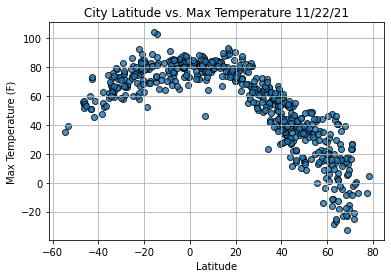

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

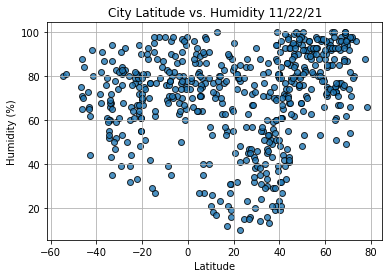

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

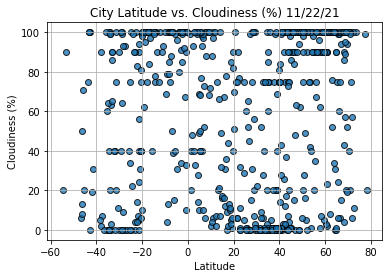

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

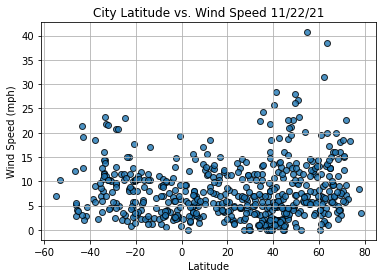

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()